In [4]:
import numpy as np 
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from cdo import *
import os
import pymannkendall as mk
CDO = Cdo()

In [2]:
data = xr.open_dataset('../GPM_Original_Res_Stacks/Stacks/GPM_original_res_stack_2020_00.nc')
data['GPM_3IMERGHHE_06_precipitationCal']

<xarray.DataArray 'GPM_3IMERGHHE_06_precipitationCal' (time: 122, lat: 289,
                                                       lon: 294)>
[10365852 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 6.75 6.85 6.95 7.05 7.15 ... 35.25 35.35 35.45 35.55
  * lon      (lon) float32 68.15 68.25 68.35 68.45 ... 97.15 97.25 97.35 97.45
Dimensions without coordinates: time

In [41]:
data = xr.open_dataset('../A_Stack_Yearwise/Stacked_interpolated_GPM_files/GPM_stack_2020_00.nc')
data

<xarray.Dataset>
Dimensions:                            (lon: 119, lat: 117, time: 122)
Coordinates:
  * lon                                (lon) float64 68.12 68.38 ... 97.38 97.62
  * lat                                (lat) float64 6.625 6.875 ... 35.38 35.62
Dimensions without coordinates: time
Data variables:
    GPM_3IMERGHHE_06_precipitationCal  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Dec 22 16:01:39 2023: cdo remapnn,./1998_00_rx1day_pyt....
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

## Defning CDD for GPM data

In [9]:
CDO.etccdi_cdd(input='../A_Stack_Yearwise/Stacked_interpolated_GPM_files/GPM_stack_2020_00.nc',output="2020_00_cdd.nc")

'2020_00_cdd.nc'

In [4]:
path = "../A_Stack_Yearwise/Stacked_interpolated_GPM_files/"
op_path = '../INDICES/ECA_r10MM_HEAVY_PRECIPITATION/'
hour = ["00","03","06","09","12","15","18","21"]
for year in range(2020,2024):
    for h in hour:
        CDO.eca_r10mm(input=f'{path}GPM_stack_{year}_{h}.nc',output=f'{op_path}{year}_eca_r10mm/{year}_{h}_eca_r10mm.nc')

In [20]:
op_path = '../INDICES/Extremely_Wet_Precipitation/'
for year in range(2020,2024):
    for h in hour:
        # file = open(f'{path}/{year}/{year}_{hour}_stack.nc','r')
        timmin = CDO.timmin(input=f'{path}GPM_stack_{year}_{h}.nc')
        timmax = CDO.timmax(input=f'{path}GPM_stack_{year}_{h}.nc')
        CDO.timpctl(99,input=[f'{path}GPM_stack_{year}_{h}.nc',timmin,timmax],output=f'{op_path}/{year}/{year}_{h}_extremely_wet_prec.nc')

In [4]:
a = np.arange(1,8)
b = np.arange(11,18)
c = np.arange(21,28)

In [15]:
l=[]
for ele in a:
    l=[]
    l.append(ele)
    for i in range(0,1):
        l.append(b[ele-1])
    print(l)

[1, 11]
[2, 12]
[3, 13]
[4, 14]
[5, 15]
[6, 16]
[7, 17]


In [26]:
gpm_data = xr.open_dataset('../A_Stack_Yearwise/Stacked_interpolated_GPM_files/GPM_stack_2020_00.nc')
gpm_data

<xarray.Dataset>
Dimensions:                            (lon: 119, lat: 117, time: 122)
Coordinates:
  * lon                                (lon) float64 68.12 68.38 ... 97.38 97.62
  * lat                                (lat) float64 6.625 6.875 ... 35.38 35.62
Dimensions without coordinates: time
Data variables:
    GPM_3IMERGHHE_06_precipitationCal  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Dec 22 16:01:39 2023: cdo remapnn,./1998_00_rx1day_pyt....
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [42]:
avg_0th = 0
for i in gpm_data['GPM_3IMERGHHE_06_precipitationCal']:
    avg_0th = avg_0th+i.values
avg_0th

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [43]:
avg_0th = avg_0th/122

<Axes: >

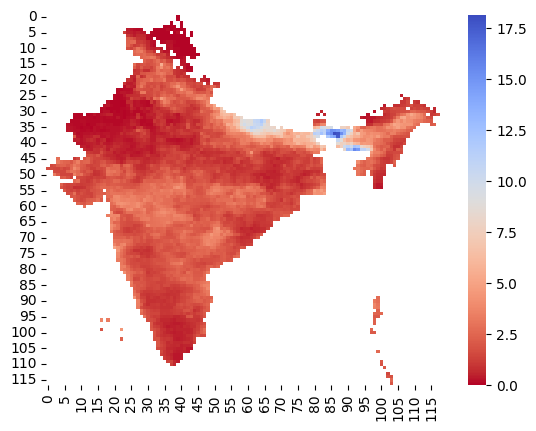

In [70]:
sns.heatmap(avg_0th[::-1],cmap='coolwarm_r')

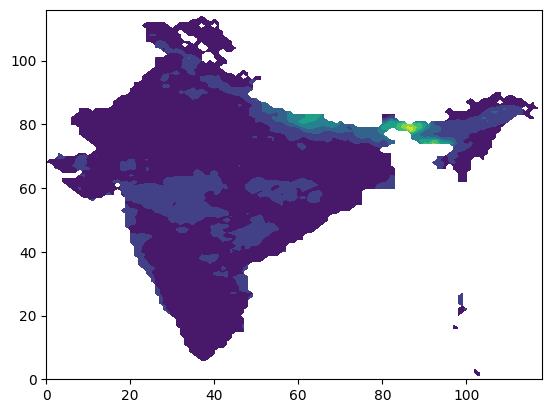

In [56]:
plt.contourf(avg_0th)
plt.show()

In [57]:
trmm_data = xr.open_dataset('../A_Stack_Yearwise/Stacks/1998/1998_0_stack.nc')
trmm_data

<xarray.Dataset>
Dimensions:                    (time: 122, bnds: 2, lon: 119, lat: 117)
Coordinates:
  * time                       (time) datetime64[ns] 1998-05-31T22:30:00 ... ...
  * lon                        (lon) float64 68.12 68.38 68.62 ... 97.38 97.62
  * lat                        (lat) float64 6.625 6.875 7.125 ... 35.38 35.62
Dimensions without coordinates: bnds
Data variables:
    time_bnds                  (time, bnds) datetime64[ns] ...
    lon_bnds                   (lon, bnds) float64 ...
    lat_bnds                   (lat, bnds) float64 ...
    TRMM_3B42_7_precipitation  (time, lat, lon) float32 ...
    shape_mask                 (time, lat, lon) float64 ...
Attributes:
    CDI:                       Climate Data Interface version 2.2.3 (https://...
    Conventions:               CF-1.4
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    nco_openmp_thread_number:  1
    start_time:                1998-05-31T22:30:00Z
    end_time:                  1998-06-01T01:29:59Z
    temporal_resolution:       3-hourly
    history:                   Sat Oct 14 00:12:32 2023: cdo -O -s -cat shape...
    CDO:                       Climate Data Operators version 2.2.1 (https://...

In [60]:
average_trmm_0th = 0
for i in trmm_data['TRMM_3B42_7_precipitation']:
    average_trmm_0th = average_trmm_0th + i.values
average_trmm_0th

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

<Axes: >

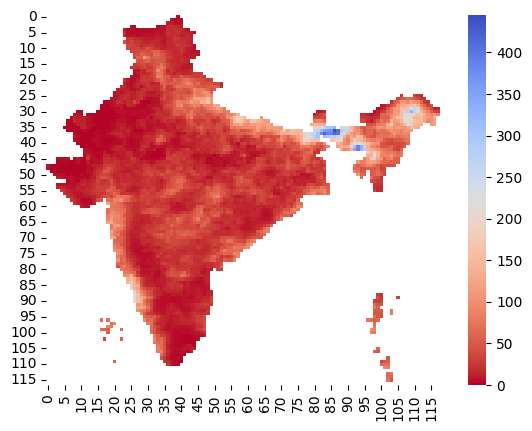

In [65]:
sns.heatmap(average_trmm_0th[::-1],cmap='coolwarm_r')

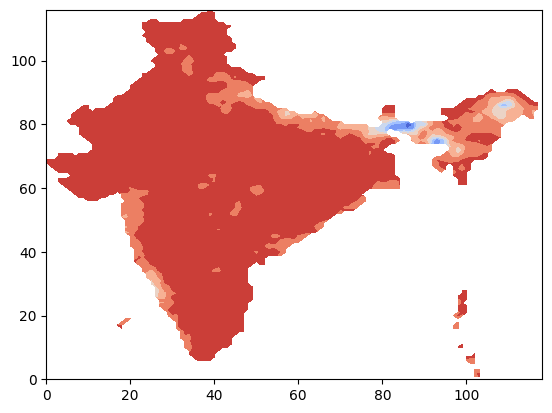

In [69]:
plt.contourf(average_trmm_0th,cmap='coolwarm_r')
plt.show()

In [71]:
d = xr.open_dataset('../A_Stack_Yearwise/Stacked_interpolated_GPM_files/GPM_stack_2020_03.nc')
d

<xarray.Dataset>
Dimensions:                            (lon: 119, lat: 117, time: 122)
Coordinates:
  * lon                                (lon) float64 68.12 68.38 ... 97.38 97.62
  * lat                                (lat) float64 6.625 6.875 ... 35.38 35.62
Dimensions without coordinates: time
Data variables:
    GPM_3IMERGHHE_06_precipitationCal  (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Dec 22 16:01:39 2023: cdo remapnn,./1998_00_rx1day_pyt....
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [82]:
avg_gpm_03 = 0
for i in d['GPM_3IMERGHHE_06_precipitationCal']:
    avg_gpm_03 = avg_gpm_03 + i.values
avg_gpm_03

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [77]:
avg_gpm_03 = pd.DataFrame(avg_gpm_03)

In [80]:
avg_gpm_03.fillna(avg_gpm_03.mean(),inplace=True)

<Axes: >

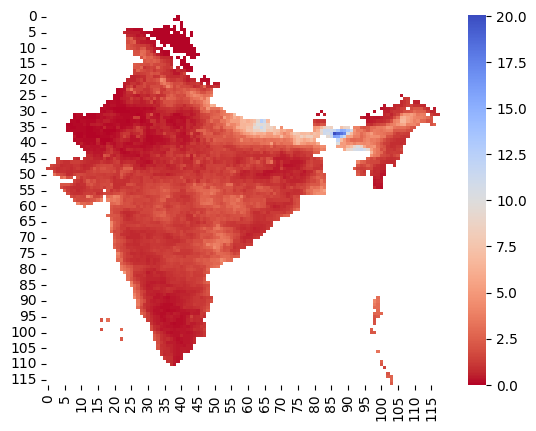

In [83]:
sns.heatmap(avg_gpm_03[::-1]/122,cmap='coolwarm_r')

In [14]:
a = [1,2,3,4,5,np.nan,np.nan,np.nan,np.nan,6,7,8,9,np.nan]
mk.original_test(a,alpha=0.01)

Mann_Kendall_Test(trend='increasing', h=True, p=0.00026326080270355767, z=3.6490022459988087, Tau=1.0, s=36.0, var_s=92.0, slope=0.6363636363636364, intercept=2.4545454545454546)

In [42]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    intercept_plot = np.array(intercept_plot).reshape(117,119)
    plot_data = xr.Dataset({
    "Max_1_Day_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
}
)
    
    intercept_plot = xr.Dataset({
    "Max_1_Day_Precipitation_Man_Kendall_Results":(["lat","lon"],intercept_plot),
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
}
)
    return plot_data,intercept_plot

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 

    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['Max_1_Day_Precipitation_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['Max_1_Day_Precipitation_Man_Kendall_Results'].plot()
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Maximum 1 Day Precipitation\n{test} results {hour} hour 1998-2019')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [50]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec,alpha=0.1) 
                mk_test_all_values.append(op)
                if(op.trend=='increasing'):
                    plot_data.append(1)
                elif(op.trend=='no trend'):
                    plot_data.append(0)
                else:
                    plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(117,119)
    plot_data = xr.Dataset({
    "Max_1_Day_Precipitation_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [6]:
def LoadData(hour):
    max_1_day_prec = []
    for year in range(2020,2024):
        data = xr.open_dataset(f'../GPM_Original_Res_Stacks/GPM_original_res_stack_{year}_{hour}.nc')
        max_1_day_prec.append(data['GPM_3IMERGHHE_06_precipitationCal'].values[0])
    return max_1_day_prec

In [ ]:
data = xr.open_dataset('../GPM_Original_Res_Stacks/GPM_original_res_stack_2020_00.nc')
len(data['GPM_3IMERGHHE_06_precipitationCal'].values)

## 0th Hour

In [7]:
gpm_data = LoadData("00")
gpm_data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [n

In [8]:
len(gpm_data)

4

In [9]:
plot_data = ManKendallTest(gpm_data)
plot_data

<xarray.Dataset>
Dimensions:                                      (lat: 117, lon: 119)
Coordinates:
  * lat                                          (lat) float64 6.625 ... 35.62
  * lon                                          (lon) float64 68.12 ... 97.62
Data variables:
    Max_1_Day_Precipitation_Man_Kendall_Results  (lat, lon) float64 nan ... nan

In [12]:
for i in plot_data['Max_1_Day_Precipitation_Man_Kendall_Results'].values:
    print(i)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  0. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan  0. nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


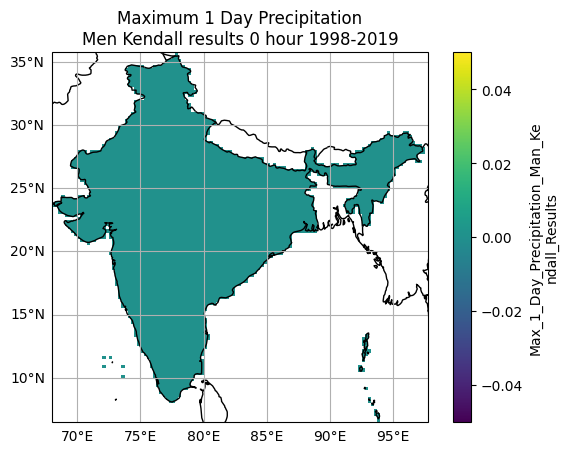

In [14]:
PlotGraph(plot_data)

In [16]:
for i in gpm_data[0]:
    print(i)

[      nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan       nan
      

In [17]:
trmm_data = xr.open_dataset('../INDICES/RX_1day/1998/1998_00_rx1day.nc')
trmm_data

<xarray.Dataset>
Dimensions:       (time: 1, lon: 119, bnds: 2, lat: 117)
Coordinates:
  * time          (time) datetime64[ns] 1998-07-02T12:00:00
  * lon           (lon) float64 68.12 68.38 68.62 68.88 ... 97.12 97.38 97.62
  * lat           (lat) float64 6.625 6.875 7.125 7.375 ... 35.12 35.38 35.62
Dimensions without coordinates: bnds
Data variables:
    lon_bnds      (lon, bnds) float64 ...
    lat_bnds      (lat, bnds) float64 ...
    rx1dayETCCDI  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.2.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Nov 01 13:27:08 2023: cdo -O -s -etccdi_rx1day ../A_Sta...
    CDO:          Climate Data Operators version 2.2.1 (https://mpimet.mpg.de...

In [21]:
for i in trmm_data['rx1dayETCCDI'].values[0]:
    print(i)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
[  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   na

<Axes: >

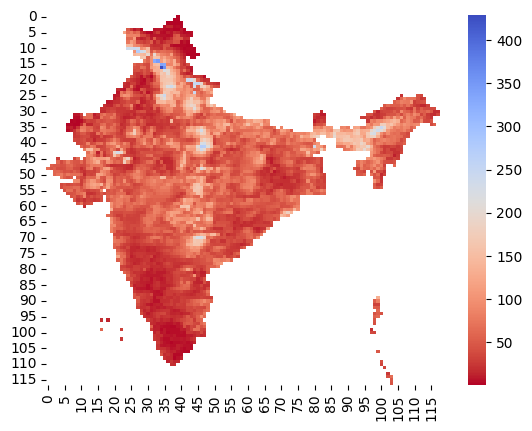

In [33]:
sns.heatmap(gpm_data[3][::-1],cmap='coolwarm_r')

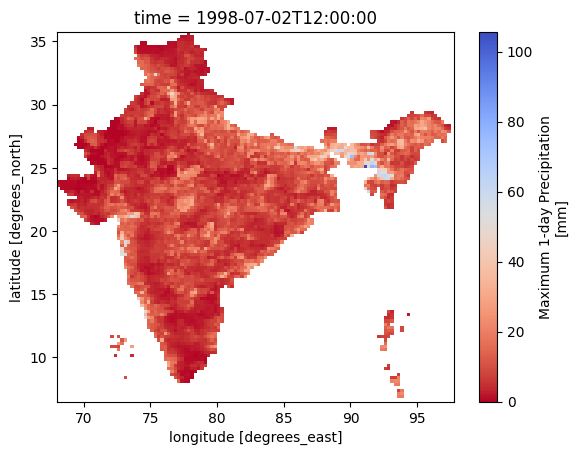

In [28]:
trmm_data['rx1dayETCCDI'].plot(cmap='coolwarm_r')

## 3rd Hour

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

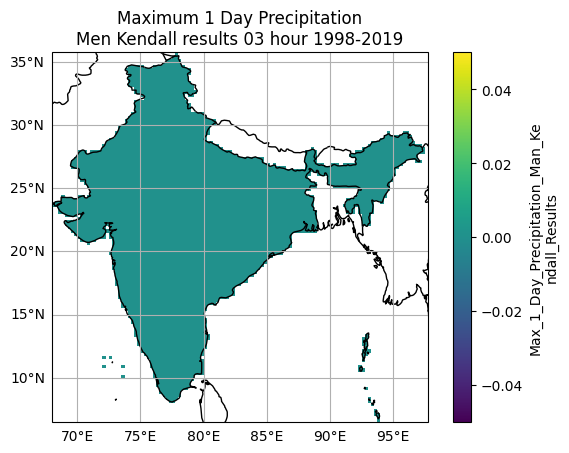

In [8]:
gpm_data = LoadData("03")
plot_data = ManKendallTest(gpm_data)
PlotGraph(plot_data,hour="03")

## Original GPM Resolution Mann Kendall Test

In [15]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/CDD_Consecutive_Dry_Days/'
for year in range(2020,2024):
    for hour in hours:
        CDO.etccdi_cdd(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_cdd.nc')


In [16]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/CWD_Consecutive_Wet_Days/'
for year in range(2020,2024):
    for hour in hours:
        CDO.etccdi_cwd(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_cwd.nc')


In [17]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/ECA_r10MM_HEAVY_PRECIPITATION/'
for year in range(2020,2024):
    for hour in hours:
        CDO.etccdi_r10mm(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_eca_r10mm.nc')


In [18]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/ECA_R20MM_VERY_HEAVY_PRECIPITATION/'
for year in range(2020,2024):
    for hour in hours:
        CDO.etccdi_r20mm(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_eca_r20mm.nc')


In [3]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/ECA_R20MM_VERY_HEAVY_PRECIPITATION/'
for year in range(2020,2024):
    for hour in hours:
        CDO.eca_r20mm(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_eca_r20mm.nc')


In [21]:
hours=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/RX_1day/'
for year in range(2020,2024):
    for hour in hours:
        CDO.eca_rx1day(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc',output=f'{op_path}{year}_{hour}_rx1day.nc')


In [23]:
h=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/Very_Wet_Precipitation/'
for year in range(2020,2024):
    for hour in hours:
        timmin = CDO.timmin(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc')
        timmax = CDO.timmax(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc')
        CDO.timpctl(95,input=[f'{path}GPM_original_res_stack_{year}_{hour}.nc',timmin,timmax],output=f'{op_path}{year}_{hour}_very_wet_prec.nc')

In [24]:
h=['00','03','06','09','12','15','18','21']
path='../GPM_Original_Res_Stacks/Stacks/'
op_path = '../GPM_Original_Res_Stacks/Extremely_Wet_Precipiation/'
for year in range(2020,2024):
    for hour in hours:
        timmin = CDO.timmin(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc')
        timmax = CDO.timmax(input=f'{path}GPM_original_res_stack_{year}_{hour}.nc')
        CDO.timpctl(99,input=[f'{path}GPM_original_res_stack_{year}_{hour}.nc',timmin,timmax],output=f'{op_path}{year}_{hour}_extremely_wet_prec.nc')

In [55]:
def LoadData(hour):
    cdd = []
    for year in range(1998,2024):
        data = xr.open_dataset(f'../INDICES/CDD_Consecutive_Dry_Days/{year}/{year}_{hour}_cdd.nc')
        d = []
        for i in data['cddETCCDI'].values[0]:
            for j in i:
                if(str(j)=="NaT"):
                    d.append(np.NaN)
                else:
                    d.append(float(str(j).split(" ")[0])/8.64e+13)
        d = np.array(d).reshape(117,119)
        cdd.append(d)
    return cdd

In [56]:
gpm_data = LoadData('00')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Lib

In [52]:
len(gpm_data)

4

In [57]:
plot_data = ManKendallTest(gpm_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


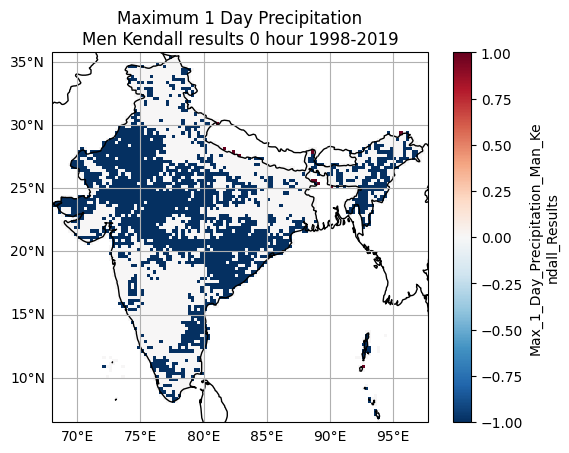

In [58]:
PlotGraph(plot_data)

In [6]:
hours=['00','03','06','09','12','15','18','21']
print(int(hours[4]))

12


In [8]:
path = '../GPM_Original_Res_Stacks/RX_5day/'
hours=['00','03','06','09','12','15','18','21']
for year in range(2020,2024):
    for hour in hours:
        os.rename(f'{path}{year}_rx5day_gpm_{int(hour)}.nc',f'{path}{year}_{hour}_rx5day.nc')

In [2]:
data = xr.open_dataset('../GPM_Original_Res_Stacks/GPM_00_half_hourly_testing.nc')
data

<xarray.Dataset>
Dimensions:                            (time: 122, lat: 289, lon: 294, latv: 2,
                                        lonv: 2, nv: 2)
Coordinates:
  * lat                                (lat) float32 6.75 6.85 ... 35.45 35.55
  * lon                                (lon) float32 68.15 68.25 ... 97.35 97.45
  * time                               (time) object 2020-06-01 00:00:00 ... ...
Dimensions without coordinates: latv, lonv, nv
Data variables:
    GPM_3IMERGHHE_06_precipitationCal  (time, lat, lon) float32 ...
    lat_bnds                           (time, lat, latv) float64 ...
    lon_bnds                           (time, lon, lonv) float64 ...
    time_bnds                          (time, nv) object ...
    shape_mask                         (time, lat, lon) float64 ...
Attributes:
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    nco_openmp_thread_number:  1
    Conventions:               CF-1.4
    start_time:                2020-06-01T00:00:00Z
    end_time:                  2020-06-01T00:30:00Z
    temporal_resolution:       half-hourly
    history:                   Mon Sep 11 07:59:01 2023: ncks -d lat,6.652917...

In [4]:
CDO.etccdi_cdd(input='./GPM_2020_00_half_hourly_testing.nc.nc',output='./GPM_CDD_Original_Resolution_0th_Hour.nc')

'./GPM_CDD_Original_Resolution_0th_Hour.nc'

In [7]:
for year in range(2020,2024):
    CDO.etccdi_cdd(input=f'./GPM_{year}_00_half_hourly_testing.nc',output=f'./GPM_Original_Resolution_CDD_{year}_00.nc')
    # data = xr.open_dataset(f'./GPM_{year}_00_half_hourly_testing.nc')
    # print(data['GPM_3IMERGHHE_06_precipitationCal'][0].values)

In [36]:
def ManKendallTest(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                op = mk.original_test(data_all_year_max_1_day_prec,alpha=0.05)
                mk_test_all_values.append(op)
                plot_data.append(op.Tau)
                # if(op.trend=='increasing'):
                #     plot_data.append(1)
                # elif(op.trend=='no trend'):
                #     plot_data.append(0)
                # elif(op.trend=='decreasing'):
                #     plot_data.append(-1)
            except:
                plot_data.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data

In [32]:
def SenSlope(max_1_day_prec):
    row=0
    col=0
    year=1
    data_all_year_max_1_day_prec = []
    plot_data=[]
    intercept_plot=[]
    mk_test_all_values=[]
    all_values_for_max_1_day_prec_on_each_grid = []
    for grids in max_1_day_prec[0]:
        col=0
        for grid_point in grids:
            data_all_year_max_1_day_prec = []
            # if(str(grid_point)!='nan'):
            data_all_year_max_1_day_prec.append(grid_point)
            for index in range(1,len(max_1_day_prec)):
                # if(str(max_1_day_prec[index][row][col])!='nan'):
                data_all_year_max_1_day_prec.append(max_1_day_prec[index][row][col])
            all_values_for_max_1_day_prec_on_each_grid.append(data_all_year_max_1_day_prec)
            try:
                slope,intercept = mk.sens_slope(data_all_year_max_1_day_prec) 
                plot_data.append(slope)
                intercept_plot.append(intercept)
            except:
                plot_data.append(np.nan)
                intercept_plot.append(np.nan)
                mk_test_all_values.append(np.nan)
            col = col + 1
        row = row + 1
    plot_data = np.array(plot_data).reshape(289,294)
    intercept_plot = np.array(intercept_plot).reshape(289,294)
    plot_data = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],plot_data),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    
    intercept_plot = xr.Dataset({
    "CDD_Man_Kendall_Results":(["lat","lon"],intercept_plot),
    # "Yue_Wang_test_values":(["x","y"],pd.DataFrame(mk_test_all_values))
},
coords={
    "lat":data['lat'].values,
    "lon":data['lon'].values,
    # "time": pd.date_range("2014-09-06", periods=3),
}
)
    return plot_data,intercept_plot

In [21]:
def LoadData(hour):
    cdd = []
    for year in range(2020,2024):
        data = xr.open_dataset(f'./GPM_Original_Resolution_CDD_{year}_00.nc')
        d = []
        for i in data['cddETCCDI'].values[0]:
            for j in i:
                if(str(j)=="NaT"):
                    d.append(np.NaN)
                else:
                    d.append(float(str(j).split(" ")[0])/8.64e+13)
        d = np.array(d).reshape(289,294)
        cdd.append(d)
    return cdd

In [25]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature
def PlotGraph(plot_data,test="Men Kendall",hour="0th",cmap=""):
    # Create a map using PlateCarree projection
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add map features
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False  
    gl.ylabels_right = False 
    gl.xlines = True 
    gl.ylines = True 
    lats = data['lat'].values
    lons = data['lon'].values[:-2]
    # ax.contourf(ds_21['Heavy_Precipitation_Yue_Wang_Results'])
    # ds_21['Heavy_Precipitation_Yue_Wang_Results'].plot.contourf(cmap="coolwarm")
    if cmap != "":
        plot_data['CDD_Man_Kendall_Results'].plot(cmap=cmap)
    else:
        plot_data['CDD_Man_Kendall_Results'].plot(cmap="seismic_r")
    # ax.plot(lons,lats,color="#00000000")
    # Plot data

    # ax.scatter(lons, lats,transform=ccrs.PlateCarree())

    # Customize and display the map
    plt.title(f'Consecutive Dry Days for GPM Original Resolution\n{test} results {hour} hour 2020-2023')
    plt.show()
    # turbo , coolwarm , coolwarm_r , bwr , bwr_r , 

In [22]:
cdd = LoadData("00")
cdd

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [23]:
len(cdd)

4

In [37]:
plot_data = ManKendallTest(cdd)
plot_data

<xarray.Dataset>
Dimensions:                  (lat: 289, lon: 294)
Coordinates:
  * lat                      (lat) float32 6.75 6.85 6.95 ... 35.35 35.45 35.55
  * lon                      (lon) float32 68.15 68.25 68.35 ... 97.35 97.45
Data variables:
    CDD_Man_Kendall_Results  (lat, lon) float64 nan nan nan nan ... nan nan nan

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


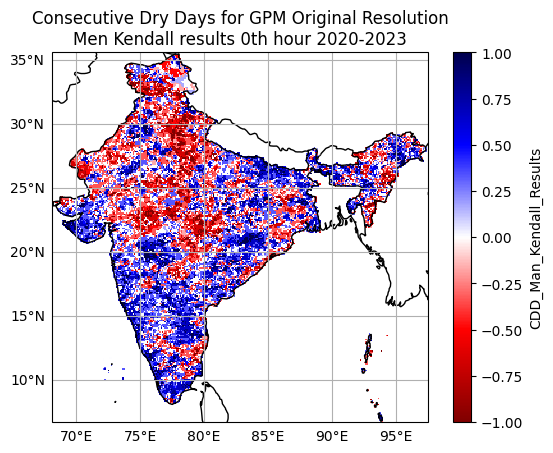

In [38]:
PlotGraph(plot_data)

In [44]:
plot_data,intercept_plot = SenSlope(cdd)

/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:180: RuntimeWarning: All-NaN slice encountered
  slope = np.nanmedian(__sens_estimator(x))
/Users/yuvrajsinhdilipsinhbodana/Library/Python/3.11/lib/python/site-packages/pymannkendall/pymannkendall.py:181: RuntimeWarning: All-NaN slice encountered
  intercept = np.nanmedian(x) - np.median(np.arange(n)[~np.isnan(x.flatten())]) * slope  # or median(x) - (n-1)/2 *slope
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


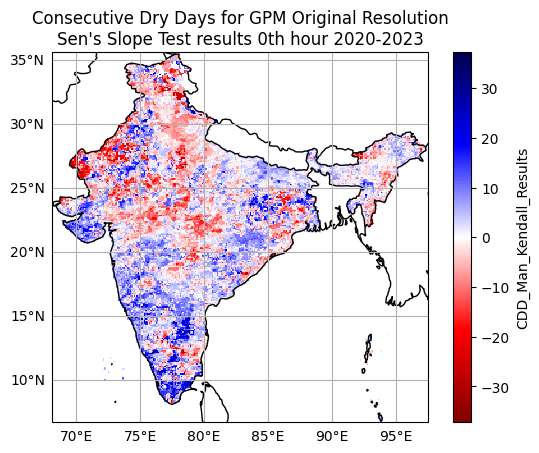

In [45]:
PlotGraph(plot_data,test="Sen\'s Slope Test")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


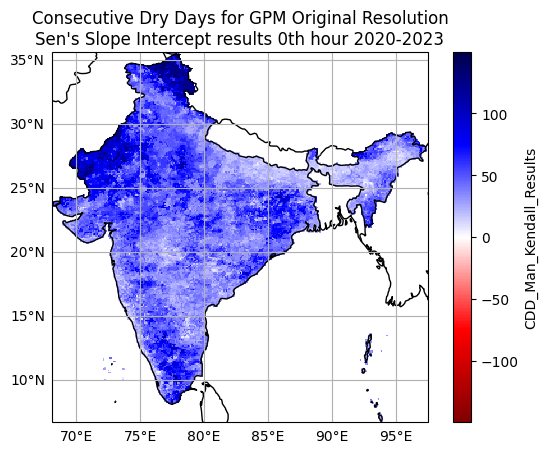

In [35]:
PlotGraph(intercept_plot,test="Sen\'s Slope Intercept")

In [48]:
mk.original_test([4,3,2,1,0,-1,-2,-3])

Mann_Kendall_Test(trend='decreasing', h=True, p=0.0008366271311193163, z=-3.340383700311406, Tau=-1.0, s=-28.0, var_s=65.33333333333333, slope=-1.0, intercept=4.0)